# Project 2
## Step 1: Explore data

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:
#Importing packages 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime
from datetime import timedelta
from scipy.stats import norm
%matplotlib inline

In [2]:
#read the data from csv and assign it to a dataframe
bd_original = pd.read_csv("../assets/billboard.csv", header=0)

In [3]:
#Wanted to verify what is created
type(bd_original)

pandas.core.frame.DataFrame

In [4]:
#checking how many rows and columns are here.
#bd_original.columns
bd_original.shape
#317 rows, 83 columns 

(317, 83)

In [5]:
bd_original.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bd_original.describe(include='all')

#using describe to get more detailed info on the data and to understand how it differs from info()
#Got 'RuntimeWarning: Invalid value encountered in percentile' error when running describe. I think it has to do with 
#some of the columns being all nan

//anaconda/envs/py27/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317,317,317,317,317,317,317.000000,312.000000,307.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,228,316,126,10,68,53,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Jay-Z,Where I Wanna Be,3:50,Rock,2000-01-29,2000-12-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,2,9,137,11,17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,79.958991,71.173077,65.045603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,NaN,NaN,NaN,NaN,NaN,NaN,14.686865,18.200443,20.752302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,8.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,74.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,81.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#bd_original.describe(include='all')

##Initial notes and thoughts on what the numbers might show us from describe: 
#top artist: Jay-Z
#top track: Where I Wanna Be
#top genre: Rock
#unique: 228 out of 317 artists
#unique: 68 out of 317 date_entered
#unique: 53 out of 317 date_peaked
#avg rank on week 1: 79.958991
#min rank on week 1: 15.000000
#max rank on week 1: 100.000000 

Initially wrote an unnecessary function to rename the week labels 

In [8]:
# #Using a function to rename weeks titles
# def replace_weeks(list_in):
#     name = ['year', 'artist', 'track', 'track_length', 'genre', 'date_entered', 'date_peaked']
#     for index, i in enumerate(list_in):
#         i = 'week_0{}'.format(index + 1)
#         name.append(i)
#     return name

# bd_weeks_only = bd_nan_dropped.iloc[:, 7:]
# bd_weeks_only.shape

# #calling replace_weeks function and returning list of new column names to cols variable
# cols = replace_weeks(bd_weeks_only.columns)

# bd_nan_dropped.columns = cols

##### Write a brief description of your data, data dictionary, and any interesting observations you've made thus far. 

There is a lot of missing data in the weeks columns, and many of the weeks at the end is empty for all rows. My first instinct is to remove all the columns from the table where data is missing for all rows. 

Initial thoughts on what I need to clean: 
1. change title artist.inverted to artist
2. change title date.entered to date_entered
3. change title date.peaked to date_peaked
4. change date_entered and date_peaked types to datetime
5. strip 'x', 'st' from week titles
6. replace '.' with '_' in week titles


column name    |data                       |type              
---------------|------------------------------------------------
year_released  |year of track release      |int64             
artist         |artist of track            |object
track          |track name                 |object
time           |length of track            |object
genre          |genre of track             |category                   
date_entered   |date track entered chart   |datetime64[ns]
date_peaked    |date track rank peaked     |datetime64[ns]
weeks_on_chart |number of weeks track was on chart |int64
days_to_peak   |number of days track took to reach peak Abreviation  |timedelta64[ns]                   
Week           |week number of track in chart    |int64
Ranking        |position number of track on chart|float64
week_date      |date of week for track on chart  |datetime64[ns]
rank_on_chart  |inverted Ranking number to improve readability of visuals|float64

## Step 2: Clean data

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that are too long, and check for missing values (replace them and explain rationale if it makes sense).

In [9]:
#rename id columns
bd_original.rename(columns={'year':'year_released','artist.inverted':'artist', 'date.entered':'date_entered', 'date.peaked':'date_peaked'}, inplace=True)

In [10]:
#change date formats
bd_original['date_entered'] = pd.to_datetime(bd_original['date_entered'])
bd_original['date_peaked'] = pd.to_datetime(bd_original['date_peaked'])

In [11]:
#adding a column for how many weeks each track is on the charts
bd_original['weeks_on_chart'] = bd_original.ix[:,7:].notnull().sum(axis=1)

In [12]:
#adding a column for how long it took(in days) for each track to reach it's peak
bd_original['days_to_peak'] = bd_original['date_peaked'] - bd_original['date_entered']

In [13]:
bd_original.head()
#Was just checking to make sure changes are going through

,year_released,artist,track,time,genre,date_entered,date_peaked,x1st.week,x2nd.week,x3rd.week,...,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,weeks_on_chart,days_to_peak
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,56 days
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,56 days
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,98 days
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,35 days
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,70 days


In [14]:
#drop entire column if all data is NaN in column
##params:
#axis='1' drops the entire column instead of dropping an entire row
#how='all' only drops columns where all the rows for that column are nan

bd_cleaned = bd_original.dropna(how='all', axis=1)

#verifying shape to make sure number of columns dropped, and rows are uneffected
#new rows = 317
#new columns = 72
bd_cleaned.shape

(317, 74)

In [15]:
bd_cleaned.head(2)

,year_released,artist,track,time,genre,date_entered,date_peaked,x1st.week,x2nd.week,x3rd.week,...,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,weeks_on_chart,days_to_peak
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,56 days
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,56 days


In [16]:
#bd_cleaned.head()
#What I've completed so far. Just creating a checkpoint for myself to brainstorm next steps:
#change title year to year_released - DONE
#change title artist.inverted to artist - DONE
#change title date.entered to date_entered - DONE
#change title date.peaked to date_peaked - DONE
#change date_entered and date_peaked types to datetime - DONE

In [17]:
#WHAT NEXT?
##From this current data, what new data can I extrapulate and add as a new column to the cleaned dataset?
#How many weeks did each track stay on the chart?
#How long did it take each track to reach it's peak?

In [18]:
# bd_cleaned.rename(columns=lambda x: x.replace('x', '').replace('.week', '_week'), inplace=True)

In [19]:
#bd_cleaned.head()

In [20]:
# bd_melt['track'] = bd_melt['track'].astype('category')
# bd_melt['artist'] = bd_melt['artist'].astype('category')
# bd_cleaned['artist'] = bd_cleaned['artist'].astype('category')
# bd_cleaned['track'] = bd_cleaned['track'].astype('category')
# bd_cleaned['genre'] = bd_cleaned['genre'].astype('category')

In [21]:
#bd_cleaned.to_csv('../assets/bd_cleaned.csv', index=False)

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [22]:
#Melting the data
bd_melt = pd.melt(bd_cleaned, id_vars=['year_released', 'artist', 'track', 'time', 'genre', 'date_entered', 'date_peaked', 'weeks_on_chart', 'days_to_peak'], value_vars=list(bd_cleaned.columns.values[7:-2]), var_name='Week', value_name='Ranking')

In [23]:
bd_melt.head(2)

,year_released,artist,track,time,genre,date_entered,date_peaked,weeks_on_chart,days_to_peak,Week,Ranking
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,28,56 days,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,26,56 days,x1st.week,15.0


In [24]:
#cleaning up the values in weeks
bd_melt['Week'] = bd_melt['Week'].map(lambda x: x.replace('x', '').replace('st', '').replace('nd', '').replace('rd', '').replace('th', '').replace('.week', ''))

In [25]:
bd_melt.head(2)

,year_released,artist,track,time,genre,date_entered,date_peaked,weeks_on_chart,days_to_peak,Week,Ranking
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,28,56 days,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,26,56 days,1,15.0


In [26]:
#changing week on chart number to int to use later
bd_melt['Week'] = bd_melt['Week'].astype(int)

In [27]:
#The week number for each track is based on the date the track entered the charts, so i'm creating a new column
#'week_date' so I can get the date for the week it's on the chart.

week_date = []

for index, date in enumerate(bd_melt['date_entered']):
    d = date
    w = timedelta(days=((int(bd_melt['Week'][index])-1)*7))
    week_date.insert(index, d + w)
    
bd_melt['week_date'] = week_date

In [28]:
bd_melt.head(2)

,year_released,artist,track,time,genre,date_entered,date_peaked,weeks_on_chart,days_to_peak,Week,Ranking,week_date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,28,56 days,1,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,26,56 days,1,15.0,2000-02-12


In [29]:
#bd_melt.dtypes

In [30]:
#Setting the genre to be a category
bd_melt['genre'] = bd_melt['genre'].astype('category')

In [31]:
#The value in the Ranking column is opposite of what it actually means on the charts. Lower value is a better rank. So
#creating a new column to invert the ranking. 
bd_melt["rank_on_chart"] = [101 - x for x in bd_melt.Ranking]

In [32]:
bd_melt.describe()

,year_released,weeks_on_chart,days_to_peak,Week,Ranking,rank_on_chart
count,20605.0,20605.000000,20605,20605.000000,5307.000000,5307.000000
mean,2000.0,16.741325,52 days 05:54:19.305993,33.000000,51.052384,49.947616
std,0.0,9.069666,40 days 19:17:52.508948,18.762118,28.966198,28.966198
min,2000.0,1.000000,0 days 00:00:00,1.000000,1.000000,1.000000
25%,2000.0,10.000000,21 days 00:00:00,17.000000,NaN,NaN
50%,2000.0,18.000000,49 days 00:00:00,33.000000,NaN,NaN
75%,2000.0,20.000000,70 days 00:00:00,49.000000,NaN,NaN
max,2000.0,57.000000,315 days 00:00:00,65.000000,100.000000,100.000000


In [33]:
#bd_melt.to_csv('../assets/bd_melt.csv', index=False)

## Step 3: Visualize your data.

##### Using BOTH a Tableau Dashboard and python, create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

In [34]:
track_ranks_avg = pd.pivot_table(bd_melt, index='track', values='rank_on_chart', aggfunc='mean')

In [35]:
track_weeks_on_chart_avg = pd.pivot_table(bd_melt, index='track', values='weeks_on_chart', aggfunc='mean')

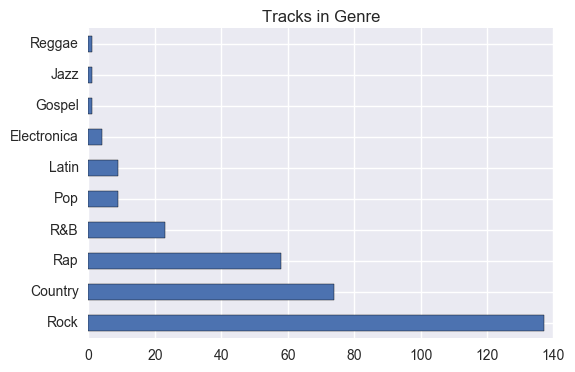

In [36]:
tracks_in_genre = bd_original.genre.value_counts()
tracks_in_genre.plot.barh(title='Tracks in Genre')

Figure above shows us that the number of tracks in the 'Rock' genre is leading the charts by almost double the 'Country' genre in 2nd place followed by 'Rap' and 'R&B'. 

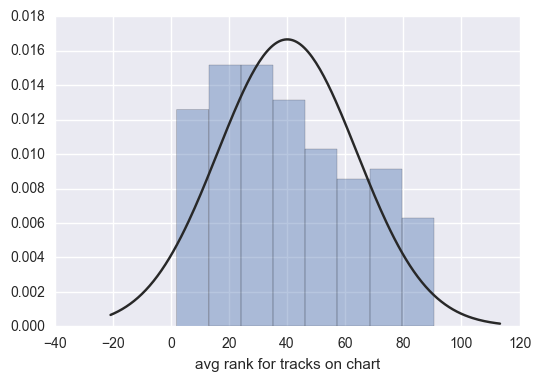

In [37]:
ax = sns.distplot(track_ranks_avg, fit=norm, kde=False, axlabel='avg rank for tracks on chart')

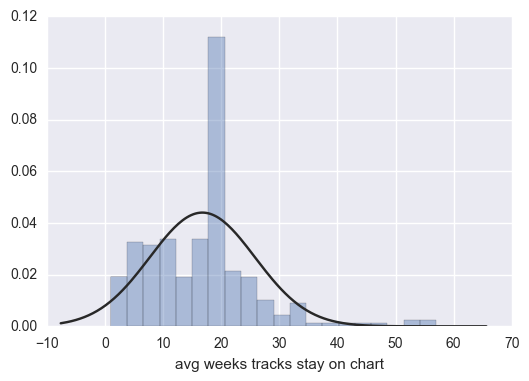

In [38]:
ax = sns.distplot(track_weeks_on_chart_avg, fit=norm, kde=False, axlabel='avg weeks tracks stay on chart')

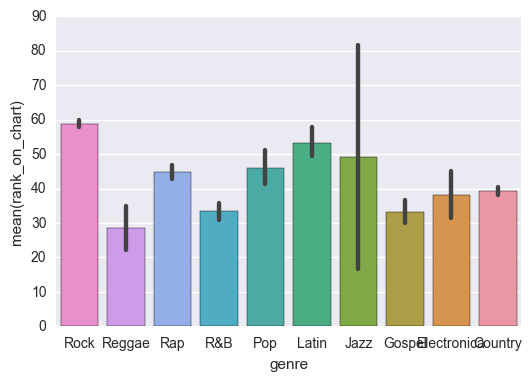

In [39]:
sns.barplot(x="genre", y="rank_on_chart", data=bd_melt)
plt.gca().invert_xaxis()

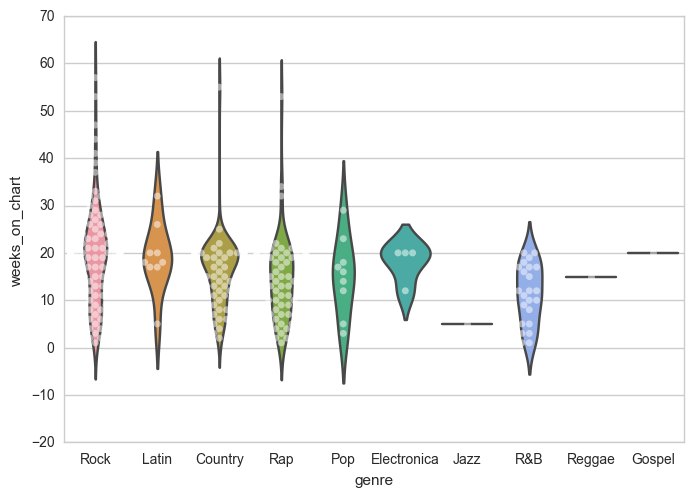

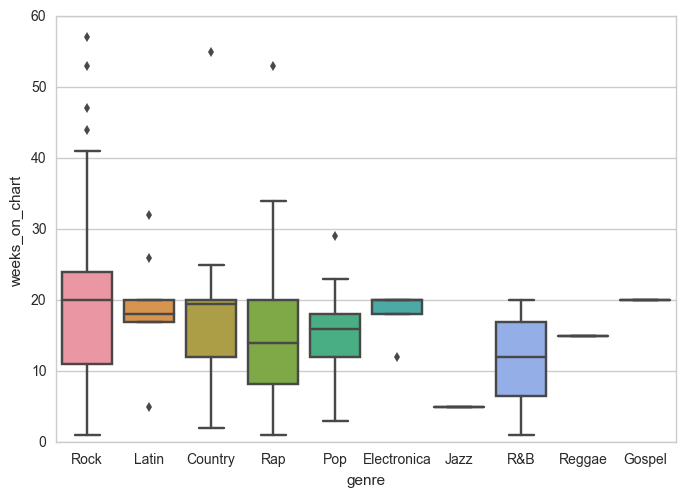

In [40]:
sns.set(style="whitegrid", color_codes=True)

sns.violinplot(x="genre", y="weeks_on_chart", data=bd_cleaned, inner=None)
sns.swarmplot(x="genre", y="weeks_on_chart", data=bd_cleaned, color='w', alpha=.5)
plt.show()

sns.boxplot(x="genre", y="weeks_on_chart", data=bd_cleaned)

The two charts above show the same data but the box plot shows us the outliers a little more clearly. 

In [41]:
%%html
<div class='tableauPlaceholder' id='viz1478497693615' style='position: relative'><noscript><a href='#'><img alt='Avg Rank For Songs In Each Week  ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;P2&#47;P2_4&#47;AvgRankForEachWeek&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='P2_4&#47;AvgRankForEachWeek' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;P2&#47;P2_4&#47;AvgRankForEachWeek&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1478497693615');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The chart above shows us the average rank of the tracks in their appropriate weeks on the billboards chart. Click on 
the 'Rock' genre filter to take it off the chart and notice how drastically it impacts the chart. 

In [42]:
%%html
<div class='tableauPlaceholder' id='viz1478498591816' style='position: relative'><noscript><a href='#'><img alt='Avg rank of artists ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;P2&#47;P2-B&#47;Avgrankofartists&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='P2-B&#47;Avgrankofartists' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;P2&#47;P2-B&#47;Avgrankofartists&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1478498591816');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement that includes risks and assumptions for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

- Guide: http://www.ceptara.com/blog/how-to-write-problem-statement
- Kaggle example: https://www.kaggle.com/c/inria-bci-challenge
- Kaggle example: https://www.kaggle.com/c/axa-driver-telematics-analysis

We are creating a new documentary series showcasing some of the top artists from the music industry whose music was moving, influencing, and rocking our nation into the turn of the century.

Today, we are surrounded by one hit wonders who come and go in the music industry. Up and coming artists in this industry today need to see what it took for top artists from the turn of the century to stay on top for long periods of times. 

For this, we need to evaluate data from the billboard charts to see which artists, and genres of music was at the top of the charts and stayed there longest. Then we can pick a group of artists from our list to use in our documentary. 

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

1. Read the given data.
2. rename columns as needed.
3. create new columns if needed.
4. create charts to visualize the data.
5. Which genre stays on the charts longest?
6. Which genre has the highest number of tracks on the chart?
7. Which artists have the highest average ranks on the chart?

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a site and post your process and results. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers.

### BONUS: LinkedIn has recognized you as a DS thought leader and asked you to pen a white paper (~500 words) on 'Best Practices for Clean Data'. This will be an opinion piece read by a wide (including semi-technical) audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: Look for online resources (articles, blogs, papers, youtube, podcasts, reddit) that will help you understand the challenges and implications of dealing with big data and missing data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 

Score | /24
----- | ------
Identify: Problem Statement / Hypothesis	| 		
Identify: Risks & Assumptions				| 
Acquire: Import Data Using Pandas			| 
Parse: Perform EDA Using Pandas				| 
Viz: Tableau Dashboard and Plots			| 
Mine: Determine Correlations				|
Refine: Evaluate Findings				    |
Present: Describe Results in Blog Post		|
Bonus! Present: Write a short White Paper	| /5